In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import re
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
pip install pandas openpyxl

In [3]:
df =  pd.read_excel('Catalogo1960_2023.xlsx')

In [6]:
 df['FECHA_UTC'] = pd.to_datetime(df['FECHA_UTC'], format='%Y%m%d')

In [7]:
df.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE
0,0,1960-01-13,154034,-16.145,-72.144,60,7.5,20223006
1,1,1960-01-15,93024,-15.000,-75.000,70,7.0,20223006
2,2,1960-01-17,25758,-14.500,-74.500,150,6.4,20223006
3,3,1960-01-23,33732,-12.500,-68.500,300,5.8,20223006
4,4,1960-01-30,50724,-5.500,-77.500,100,5.7,20223006


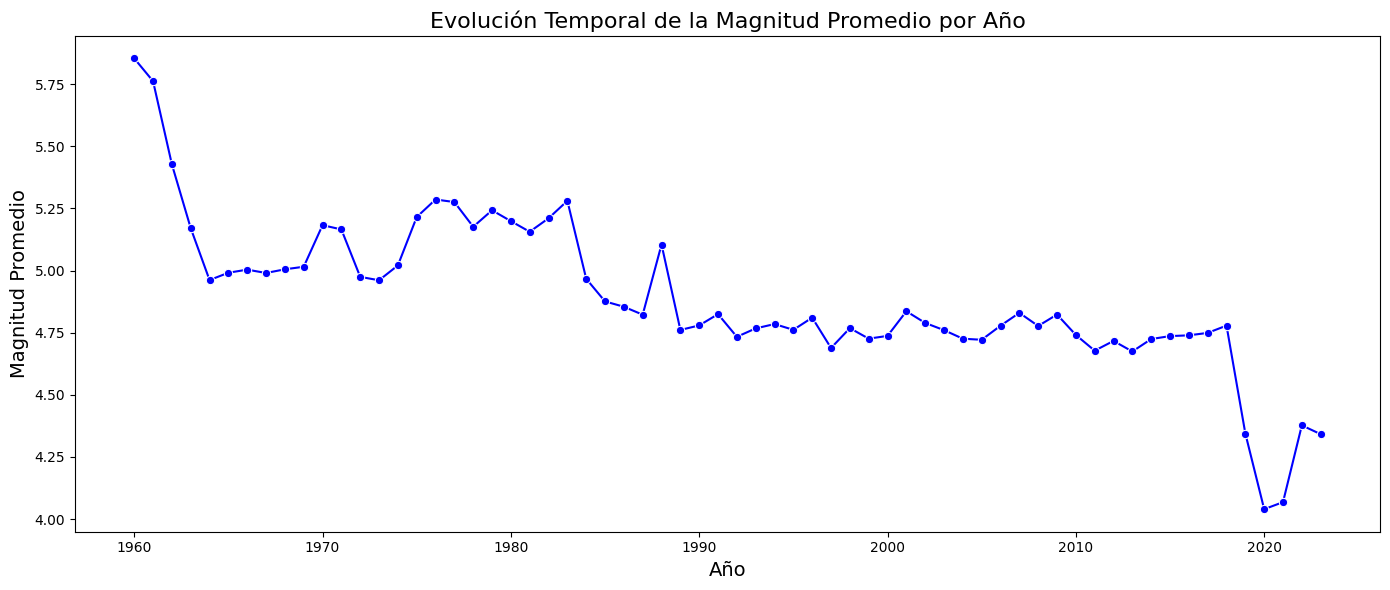

In [8]:
df['año'] = df['FECHA_UTC'].dt.year
promedios_por_año = df.groupby('año')['MAGNITUD'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='año', y='MAGNITUD', data=promedios_por_año, marker='o', color='b')
plt.title("Evolución Temporal de la Magnitud Promedio por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Magnitud Promedio", fontsize=14)
plt.tight_layout()
plt.show()


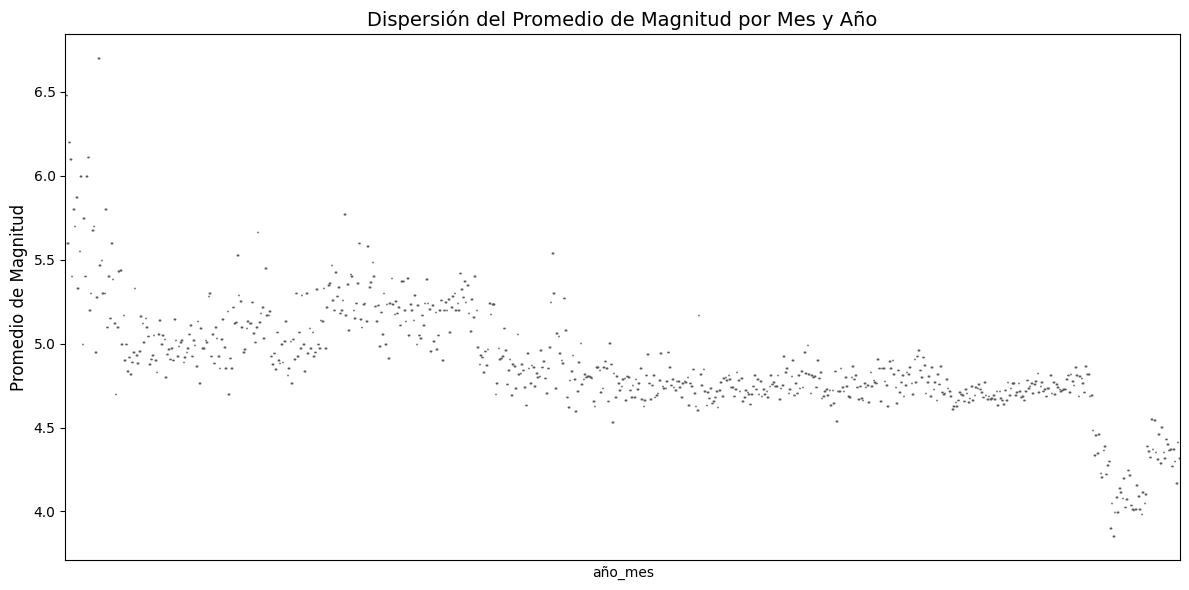

In [9]:

df['año'] = df['FECHA_UTC'].dt.year  # Año
df['mes'] = df['FECHA_UTC'].dt.month  # Mes
promedios_mensuales = df.groupby(['año', 'mes'])['MAGNITUD'].mean().reset_index()
promedios_mensuales['año_mes'] = promedios_mensuales['año'].astype(str) + '-' + promedios_mensuales['mes'].astype(str).str.zfill(2)
plt.figure(figsize=(12, 6))
sns.boxplot(x='año_mes', y='MAGNITUD', data=promedios_mensuales, palette='Set2')
plt.title("Dispersión del Promedio de Magnitud por Mes y Año", fontsize=14)
plt.ylabel("Promedio de Magnitud", fontsize=12)
plt.xticks([])
plt.tight_layout()
plt.show()


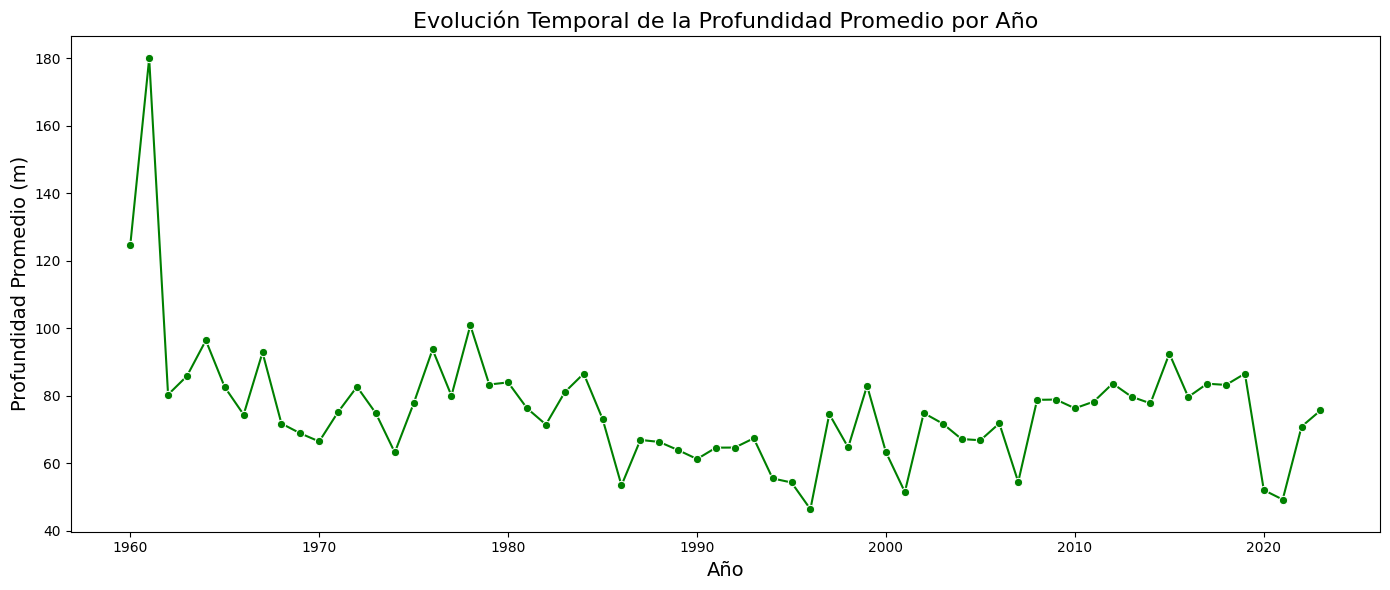

In [11]:
df['año'] = df['FECHA_UTC'].dt.year
promedios_por_año_profundidad = df.groupby('año')['PROFUNDIDAD'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='año', y='PROFUNDIDAD', data=promedios_por_año_profundidad, marker='o', color='g')
plt.title("Evolución Temporal de la Profundidad Promedio por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Profundidad Promedio (m)", fontsize=14)
plt.tight_layout()
plt.show()


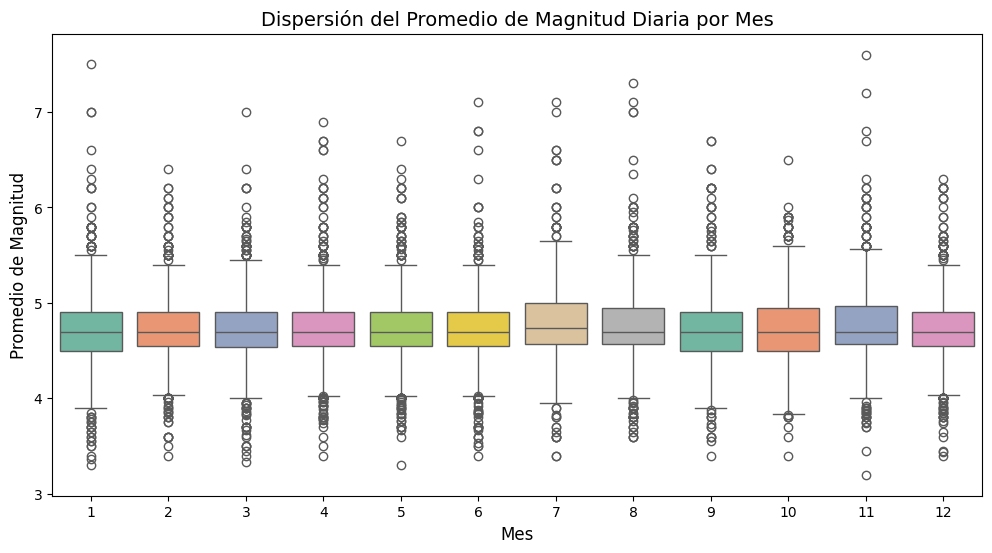

In [10]:
df['mes'] = df['FECHA_UTC'].dt.month  # Mes
df['dia'] = df['FECHA_UTC'].dt.date  # Día
promedios_diarios = df.groupby(['mes', 'dia'])['MAGNITUD'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='MAGNITUD', data=promedios_diarios, palette='Set2')
plt.title("Dispersión del Promedio de Magnitud Diaria por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Promedio de Magnitud", fontsize=12)
plt.show()

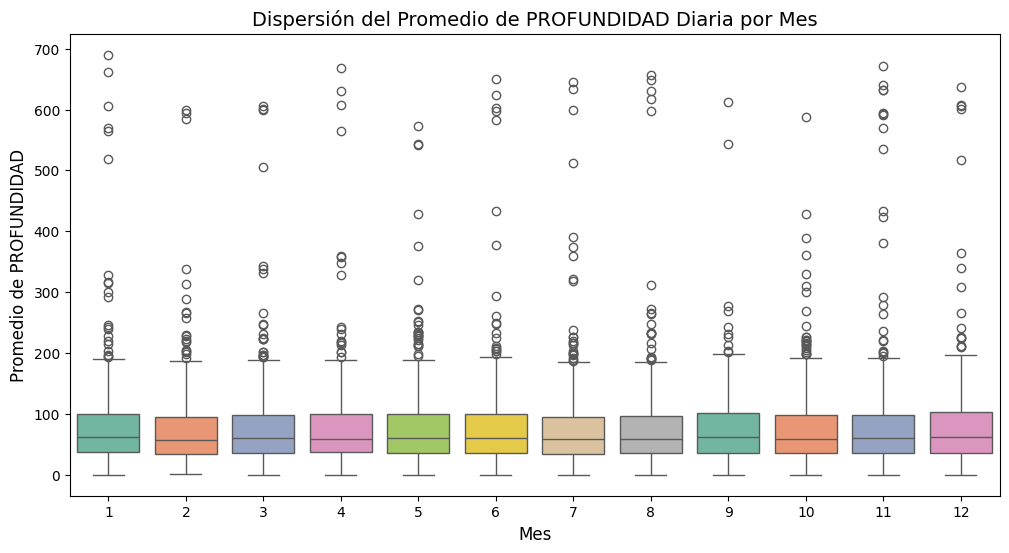

In [ ]:
df['mes'] = df['FECHA_UTC'].dt.month
df['dia'] = df['FECHA_UTC'].dt.date
promedios_diarios = df.groupby(['mes', 'dia'])['PROFUNDIDAD'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='PROFUNDIDAD', data=promedios_diarios, palette='Set2')
plt.title("Dispersión del Promedio de PROFUNDIDAD Diaria por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Promedio de PROFUNDIDAD", fontsize=12)
plt.show()

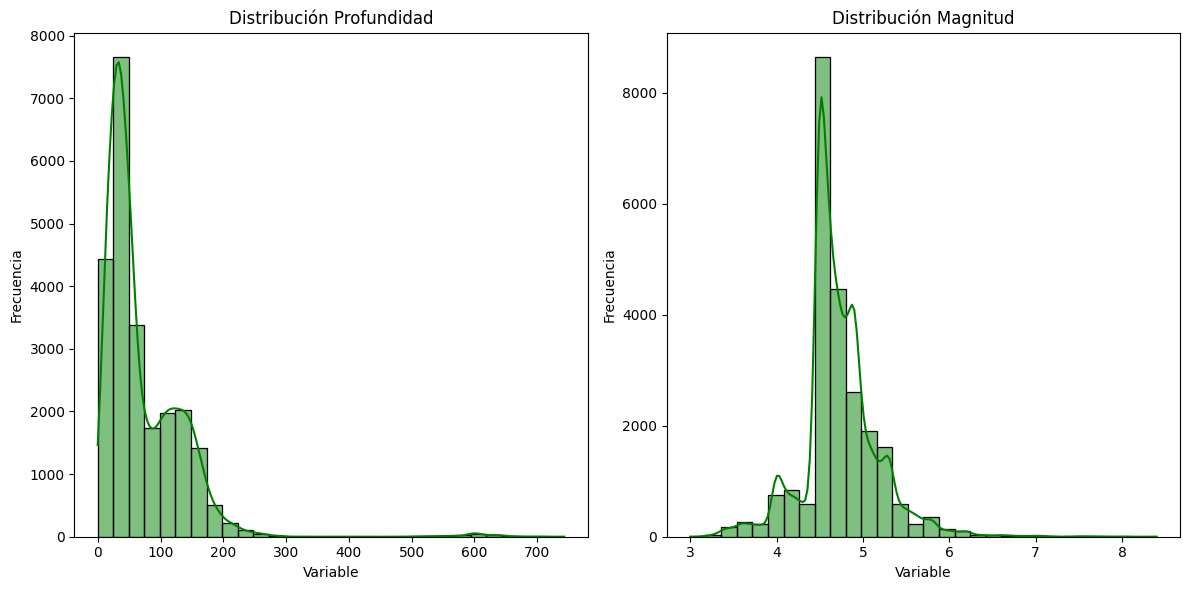

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['PROFUNDIDAD'], bins=30, kde=True, color='g')
plt.title('Distribución Profundidad')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['MAGNITUD'], bins=30, kde=True, color='g')
plt.title('Distribución Magnitud')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


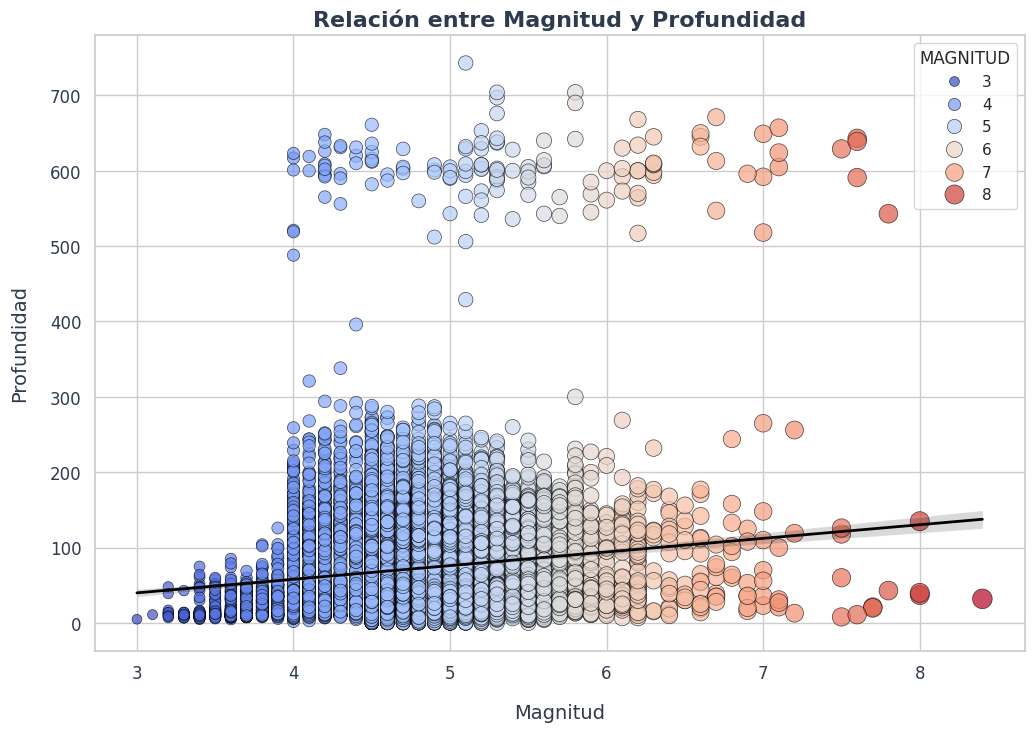

In [ ]:

df['FECHA_UTC'] = pd.to_datetime(df['FECHA_UTC'], format='%Y%m%d')
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='MAGNITUD', y='PROFUNDIDAD', hue='MAGNITUD', palette='coolwarm',
                size='MAGNITUD', sizes=(50, 200), alpha=0.7, edgecolor='black', linewidth=0.5)
sns.regplot(data=df, x='MAGNITUD', y='PROFUNDIDAD', scatter=False, color='gray', line_kws={"color": "black", "lw": 2})
plt.title('Relación entre Magnitud y Profundidad', fontsize=16, color='#2E3B4E', weight='bold')
plt.xlabel('Magnitud', fontsize=14, color='#2E3B4E', labelpad=15)
plt.ylabel('Profundidad', fontsize=14, color='#2E3B4E', labelpad=15)

plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='#2E3B4E')

# Leyenda sin

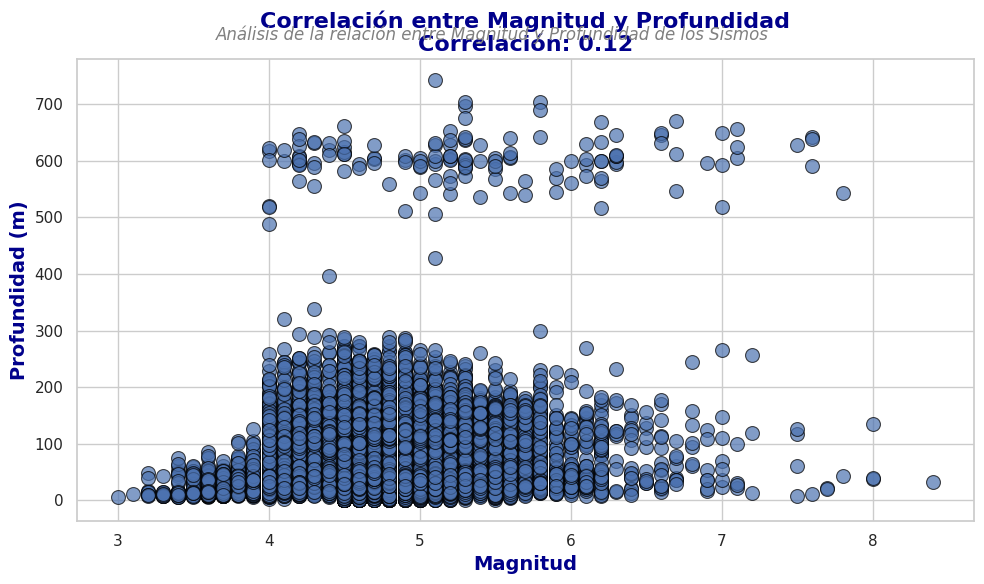

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df[['MAGNITUD', 'PROFUNDIDAD']].corr().iloc[0, 1]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='MAGNITUD', y='PROFUNDIDAD', data=df, color='#4C72B0', s=100, edgecolor='black', alpha=0.7)

scatter_plot.set_title(f"Correlación entre Magnitud y Profundidad\nCorrelación: {correlacion:.2f}",
                       fontsize=16, fontweight='bold', color='darkblue')
scatter_plot.set_xlabel("Magnitud", fontsize=14, fontweight='bold', color='darkblue')
scatter_plot.set_ylabel("Profundidad (m)", fontsize=14, fontweight='bold', color='darkblue')
plt.figtext(0.5, 0.92, "Análisis de la relación entre Magnitud y Profundidad de los Sismos",
            ha='center', fontsize=12, color='gray', style='italic')
plt.tight_layout()
plt.show()


In [15]:
df_alto = df[(df['MAGNITUD'] >= 4) & (df['PROFUNDIDAD'] > 0)]

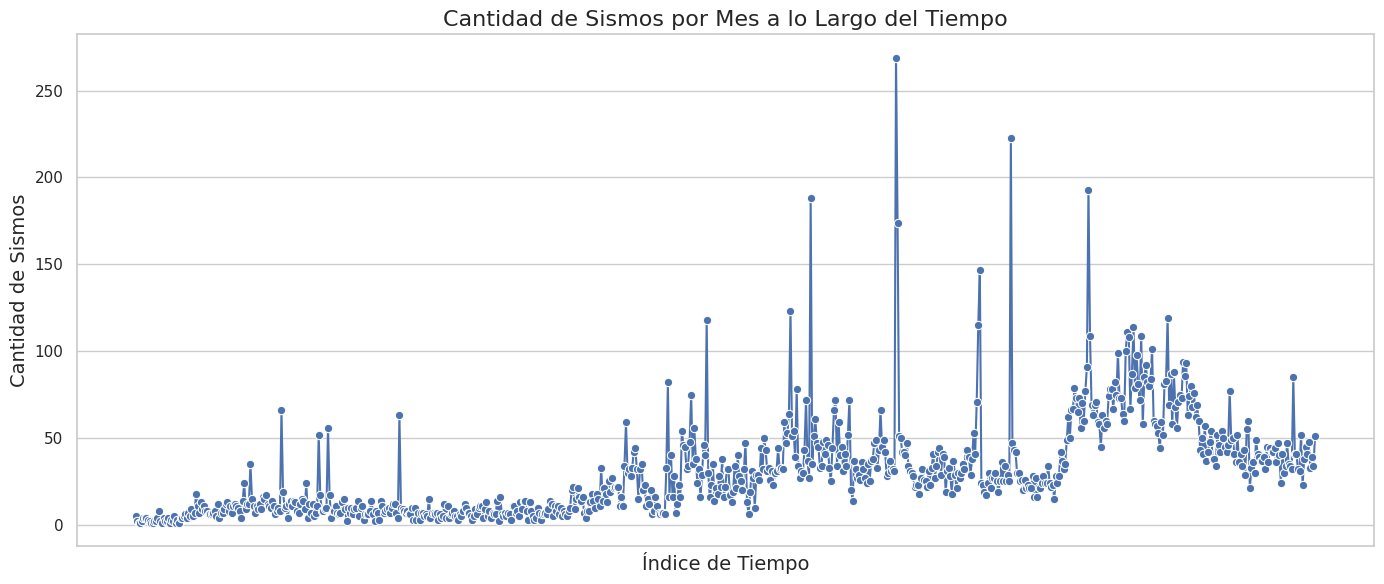

In [16]:

df_alto['año'] = df_alto['FECHA_UTC'].dt.year
df_alto['mes'] = df_alto['FECHA_UTC'].dt.month
cantidad_sismos = df_alto.groupby(['año', 'mes']).size().reset_index(name='cantidad_sismos')
cantidad_sismos['año_mes'] = cantidad_sismos['año'].astype(str) + '-' + cantidad_sismos['mes'].astype(str).str.zfill(2)
plt.figure(figsize=(14, 6))
sns.lineplot(x=cantidad_sismos.index, y='cantidad_sismos', data=cantidad_sismos, marker='o', color='b')
plt.title("Cantidad de Sismos por Mes a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Índice de Tiempo", fontsize=14)  # Cambiar etiqueta del eje X
plt.ylabel("Cantidad de Sismos", fontsize=14)
plt.xticks([])
plt.tight_layout()
plt.show()


In [ ]:
pip install matplotlib basemap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
import folium
from folium import plugins
import branca

colormap = branca.colormap.linear.YlGnBu_09.scale(df_alto['MAGNITUD'].min(), df_alto['MAGNITUD'].max())
at_mean = df_alto['LATITUD'].mean()
lon_mean = df_alto['LONGITUD'].mean()
map_ = folium.Map(location=[lat_mean, lon_mean], zoom_start=12)
for idx, row in df_alto.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=row['MAGNITUD']*1,
        color=colormap(row['MAGNITUD']),
        fill=True,
        fill_color=colormap(row['MAGNITUD']),
        fill_opacity=0.9,
        popup=f"Profundidad: {row['PROFUNDIDAD']}\nMagnitud: {row['MAGNITUD']}",
    ).add_to(map_)

colormap.add_to(map_)
map_




In [ ]:
df_promedio_mes.head()

,Mes_Año,profundidad_promedio,magnitud_promedio
0,1960-01,136.0,6.48
1,1960-02,143.0,5.60
2,1960-03,80.0,6.20
3,1960-04,100.0,6.10
4,1960-05,80.0,5.40


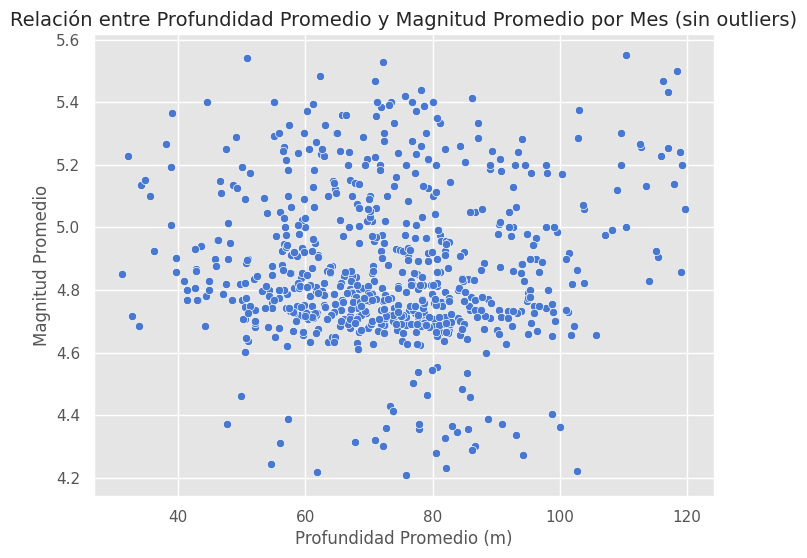

In [ ]:
Q1_profundidad = df_promedio_mes['profundidad_promedio'].quantile(0.25)
Q3_profundidad = df_promedio_mes['profundidad_promedio'].quantile(0.75)
IQR_profundidad = Q3_profundidad - Q1_profundidad
limite_inferior_profundidad = Q1_profundidad - 1.5 * IQR_profundidad
limite_superior_profundidad = Q3_profundidad + 1.5 * IQR_profundidad
Q1_magnitud = df_promedio_mes['magnitud_promedio'].quantile(0.25)
Q3_magnitud = df_promedio_mes['magnitud_promedio'].quantile(0.75)
IQR_magnitud = Q3_magnitud - Q1_magnitud
limite_inferior_magnitud = Q1_magnitud - 1.5 * IQR_magnitud
limite_superior_magnitud = Q3_magnitud + 1.5 * IQR_magnitud
df_filtrado = df_promedio_mes[
    (df_promedio_mes['profundidad_promedio'] >= limite_inferior_profundidad) &
    (df_promedio_mes['profundidad_promedio'] <= limite_superior_profundidad) &
    (df_promedio_mes['magnitud_promedio'] >= limite_inferior_magnitud) &
    (df_promedio_mes['magnitud_promedio'] <= limite_superior_magnitud)
]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='profundidad_promedio', y='magnitud_promedio', data=df_filtrado, color='b')
plt.title('Relación entre Profundidad Promedio y Magnitud Promedio por Mes (sin outliers)', fontsize=14)
plt.xlabel('Profundidad Promedio (m)', fontsize=12)
plt.ylabel('Magnitud Promedio', fontsize=12)
plt.grid(True)
plt.show()
